<font size="7" Bold:> Oversample the imbalanced data.

In [1]:
import imblearn
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import Counter
import torch
import preprocessing as pp
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df_train = pd.read_csv("train_data.csv",index_col=0)
print(df_train.shape)

(318438, 17)


In [2]:
df_train= pp.FeatureProcessing(df_train)
stay_list = df_train["Stay"].unique()
stay_list.sort()
dept_Stay = dict(zip(stay_list, range(len(stay_list))))
#print(dept_Stay)
df_train["Stay"].replace(dept_Stay, inplace=True)
y = df_train.Stay
x = df_train.drop(["Stay", "City_Code_Patient", "patientid"],axis=1, inplace=False)

Class=0, n=23604 (7.412%)
Class=4, n=11743 (3.688%)
Class=3, n=55159 (17.322%)
Class=1, n=78139 (24.538%)
Class=5, n=35018 (10.997%)
Class=2, n=87491 (27.475%)
Class=7, n=10254 (3.220%)
Class=10, n=6683 (2.099%)
Class=8, n=4838 (1.519%)
Class=6, n=2744 (0.862%)
Class=9, n=2765 (0.868%)


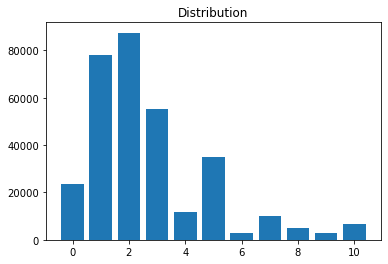

In [3]:
counter = Counter(y)
for Class, Amount in counter.items():
    per = Amount / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (Class, Amount, per))
plt.bar(counter.keys(), counter.values())
plt.title("Distribution")
plt.show()

<br>
<font size="5" Bold:> Evenly Distributed

Class=0, n=23604 (2.453%)
Class=4, n=11743 (1.220%)
Class=3, n=55159 (5.731%)
Class=1, n=78139 (8.119%)
Class=5, n=35018 (3.639%)
Class=2, n=87491 (9.091%)
Class=7, n=10254 (1.065%)
Class=10, n=6683 (0.694%)
Class=8, n=4838 (0.503%)
Class=6, n=2744 (0.285%)
Class=9, n=2765 (0.287%)


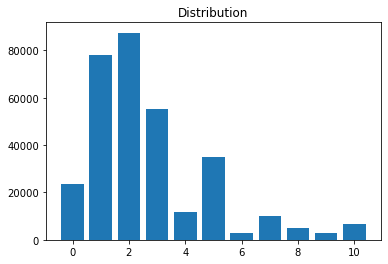

In [4]:
# transform the dataset
oversample = SMOTE()
xx, yy = oversample.fit_resample(x, y)
counter = Counter(y)
for Class, Amount in counter.items():
    per = Amount / len(yy) * 100
    print('Class=%d, n=%d (%.3f%%)' % (Class, Amount, per))
plt.bar(counter.keys(), counter.values())
plt.title("Distribution")
plt.show()

<br>
<font size="5" Bold:> Customized strategy

In [5]:
x.City_Code_Hospital.unique()

array([ 3,  5,  1,  2,  6,  9, 10,  4, 11,  7, 13])

Class=0, n=23604 (5.606%)
Class=1, n=23604 (5.606%)
Class=2, n=55159 (13.101%)
Class=3, n=78139 (18.559%)
Class=4, n=35018 (8.317%)
Class=5, n=87491 (20.780%)
Class=6, n=23604 (5.606%)
Class=7, n=23604 (5.606%)
Class=8, n=23604 (5.606%)
Class=9, n=23603 (5.606%)
Class=10, n=23603 (5.606%)


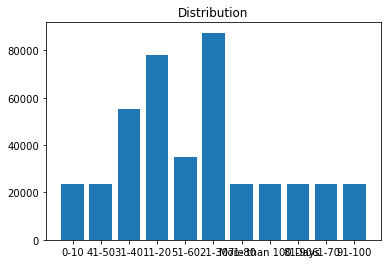

In [6]:
strategy = {0:23604, 1:78139, 2:87491, 3:55159, 4:23604, 5:35018, 6: 23604, 7: 23604, 8: 23604, 9: 23604, 10: 23604}
oversample = SMOTE(sampling_strategy=strategy)
x, y = oversample.fit_resample(x, y)

dic=y.unique()
dic.sort()
x["Stay"]=y.map({dic[0]: '0-10',dic[1]: '11-20', dic[2]: '21-30',dic[3]: '31-40', 
                                         dic[4]: '41-50',dic[5]: '51-60', dic[6]: '61-70',dic[7]: '71-80',
                                         dic[8]: '81-90', dic[9]: '91-100',dic[10]: 'More than 100 Days'})

x = x[x.City_Code_Hospital != 8]
x = x[x.City_Code_Hospital != 12]
counter = Counter(x["Stay"])
i=0
for Class, Amount in counter.items():
    per = Amount / len(x) * 100
    print('Class=%d, n=%d (%.3f%%)' % (i, Amount, per))
    i=i+1
plt.bar(counter.keys(), counter.values())
plt.title("Distribution")
plt.show()

In [7]:
x

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,2,3,2,3,3,2,5,2.000000,0,3,2,5,0.027835,0-10
1,2,2,5,2,2,3,3,5,2.000000,1,3,2,5,0.987556,41-50
2,10,4,1,0,2,1,3,4,2.000000,1,3,2,5,-0.124910,31-40
3,26,1,2,1,2,3,2,3,2.000000,1,3,2,5,2.200319,41-50
4,26,1,2,1,2,3,3,3,2.000000,1,3,2,5,0.623175,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421030,22,6,9,1,1,2,2,1,3.820127,1,2,8,4,-1.184533,More than 100 Days
421031,8,2,3,2,2,2,2,5,2.377635,0,2,9,7,0.565949,More than 100 Days
421032,29,0,4,0,2,2,3,5,3.589823,1,1,8,7,-0.622472,More than 100 Days
421033,26,1,2,1,2,2,2,3,3.000000,1,2,8,6,0.455912,More than 100 Days


In [8]:
xS1=x.loc[x["Stay"] == '11-20'].sample(n=23604, random_state=42)
xS2=x.loc[x["Stay"] == '21-30'].sample(n=23604, random_state=42)
xS3=x.loc[x["Stay"] == '31-40'].sample(n=23604, random_state=42)
xS5=x.loc[x["Stay"] == '51-60'].sample(n=23604, random_state=42)


x= x[x.Stay!='11-20']
x= x[x.Stay!='21-30']
x= x[x.Stay!='31-40']
x= x[x.Stay!='51-60']
x = pd.concat([x, xS1,xS2,xS3,xS5])

<font size ="5"> Downsample class 1,2,3,5

In [9]:
x_shuffle=x.sample(frac=1, random_state=8)
#x_shuffle["case_id"]=df_train["case_id"][0:len(df_train)]

Class=0, n=23604 (9.091%)
Class=1, n=23603 (9.091%)
Class=2, n=23604 (9.091%)
Class=3, n=23603 (9.091%)
Class=4, n=23604 (9.091%)
Class=5, n=23604 (9.091%)
Class=6, n=23604 (9.091%)
Class=7, n=23604 (9.091%)
Class=8, n=23604 (9.091%)
Class=9, n=23604 (9.091%)
Class=10, n=23604 (9.091%)


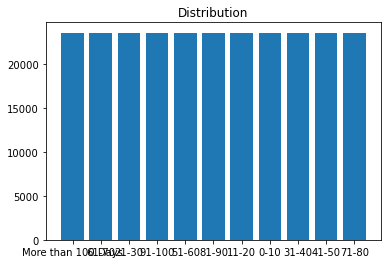

In [10]:
counter = Counter(x_shuffle["Stay"])
i=0
for Class, Amount in counter.items():
    per = Amount / len(x_shuffle) * 100
    print('Class=%d, n=%d (%.3f%%)' % (i, Amount, per))
    i+=1
plt.bar(counter.keys(), counter.values())
plt.title("Distribution")
plt.show()

<br>
<font size = "5"> Save to excel

In [11]:
x_shuffle.to_csv(r'resample.csv', index = False)

In [12]:
x_shuffle.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
412482,23,0,6,0,2,2,2,5,3.000000,0,1,7,4,-1.312446,More than 100 Days
344966,11,1,2,1,4,2,1,3,2.046537,0,2,6,4,-1.421634,61-70
308386,25,4,1,0,4,2,2,4,3.000000,0,1,2,3,-0.526098,21-30
398823,32,5,9,1,1,2,3,1,3.000000,0,1,9,5,-0.140223,91-100
270026,23,0,6,0,7,2,1,5,2.000000,2,2,2,4,2.881233,21-30


<br>
<font size = "5">Correlation Heatmap 

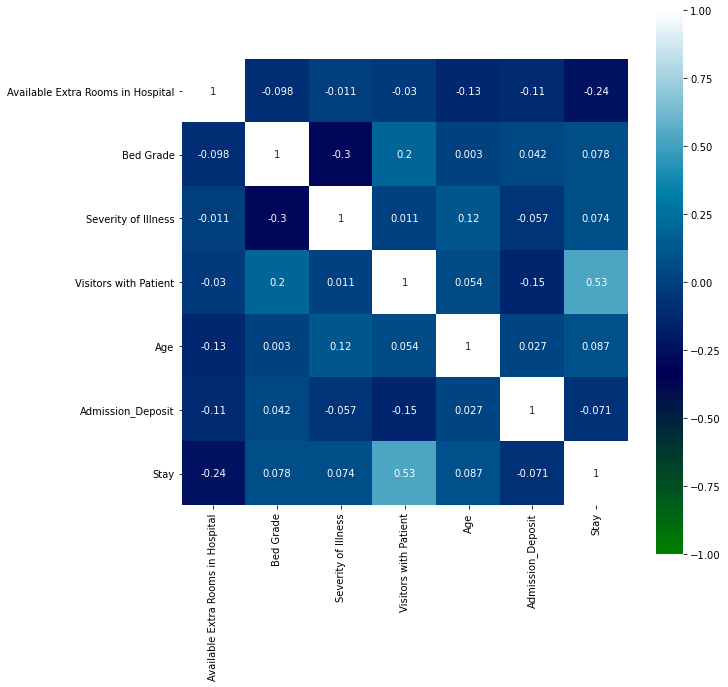

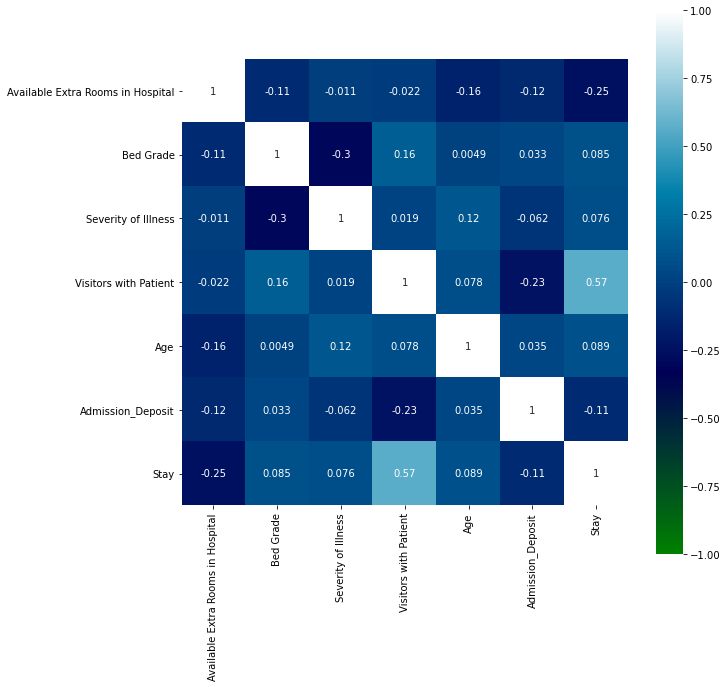

In [13]:
x_shuffle["Stay"].replace(dept_Stay, inplace=True)
c_corr=x_shuffle.drop(["Hospital_code", "Hospital_type_code", "City_Code_Hospital","Hospital_region_code",
                   "Department","Ward_Type","Ward_Facility_Code","Type of Admission"],axis=1, inplace=False)

sc = StandardScaler()
c_corr[['Available Extra Rooms in Hospital']] = sc.fit_transform(c_corr[['Available Extra Rooms in Hospital']])
c_corr[['Bed Grade']] = sc.fit_transform(c_corr[['Bed Grade']])    
c_corr[['Severity of Illness']] = sc.fit_transform(c_corr[['Severity of Illness']])
c_corr[['Visitors with Patient']] = sc.fit_transform(c_corr[['Visitors with Patient']])
c_corr[['Age']] = sc.fit_transform(c_corr[['Age']])
c_corr[['Stay']] = sc.fit_transform(c_corr[['Stay']])

PearsonCorr = c_corr.corr(method="pearson") 
plt.figure(figsize=(10,10))
sns.heatmap(PearsonCorr, vmin=-1, vmax=1, square=True,annot=True,cmap='ocean')


PearsonCorr = c_corr.corr(method="spearman")
plt.figure(figsize=(10,10))
sns.heatmap(PearsonCorr, vmin=-1, vmax=1, square=True,annot=True,cmap='ocean')